# Calculate optimal 2 by 2 with 45 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

prefill replay memory
start training
 new max record arrange grid:  2.897520861323181
 new max record arrange grid:  3.6219006071525643
   10 mean training reward:  2.97
 new max record arrange grid:  3.6219007636530347
   20 mean training reward:  3.01
   30 mean training reward:  2.83
   40 mean training reward:  2.90
 new max record arrange grid:  3.6219007636530356
 new max record arrange grid:  3.621901076653976
   50 mean training reward:  2.93
   60 mean training reward:  3.04
   70 mean training reward:  2.90
   80 mean training reward:  3.04
   90 mean training reward:  2.72
  100 mean training reward:  2.97
  110 mean training reward:  3.11
  120 mean training reward:  3.04
  130 mean training reward:  2.93
  140 mean training reward:  2.93
  150 mean training reward:  2.83
  160 mean training reward:  2.79
  170 mean training reward:  3.22
  180 mean training reward:  3.04
  190 mean training reward:  3.01
  200 mean training reward:  3.15
  210 mean training reward:  3.08
 

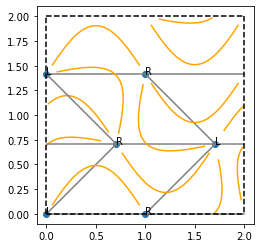

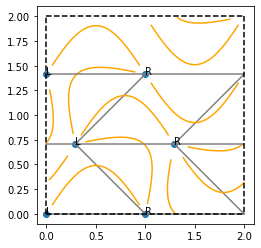

[2.897520861323181, 2.897520861323181, 3.6219006071525643, 3.6219006071525643, 3.6219007636530347, 3.6219007636530347, 3.6219007636530356, 3.6219007636530356, 3.621901076653976, 3.621901076653976, 3.6219010766539763, 3.6219010766539763]
[1, 5, 5, 11, 11, 41, 41, 47, 47, 398, 398, 500]


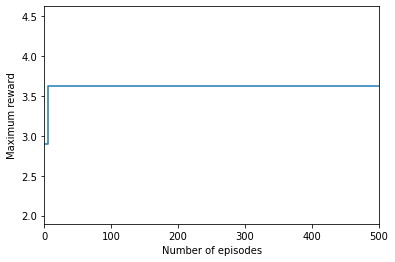

In [2]:
# we start from scratch here
subgraphs = Subgraphs(angles=[0, 45, 90, 135, 180], 
# subgraphs = Subgraphs(angles=[0, 30, 60, 90, 120, 150, 180],
                      lengths=[1])

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs)

# Angles length + length -2 to account for the symmetric angles + 4 metadata inputs = the inputs

NUM_EPISODES = 500#15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=12, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64, #8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000, #16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

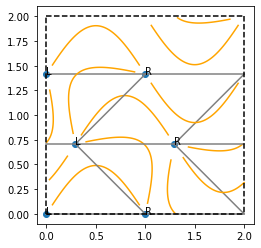

In [3]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [4]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

---- start prediction using pretrained model -----
 new max record arrange grid:  2.8975205483222393
 new max record arrange grid:  3.2597106559876377
   10 mean prediction reward:  2.90
 new max record arrange grid:  3.2597109689885784
   20 mean prediction reward:  2.90
---------------------- done ----------------------


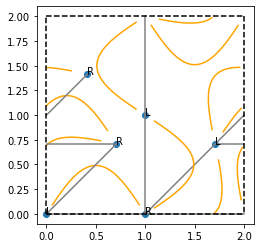

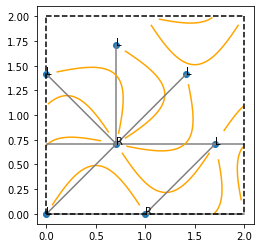

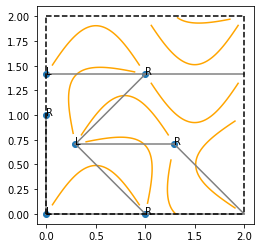

In [7]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)